In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)


In [77]:
# Read only the required sheet
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [78]:
#EDA
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


((908, 13), None)

In [79]:
#finding null value
df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [80]:
#Replace null values with median value
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [81]:
#convert bool to string
df['fbs'] = df['fbs'].map({True: 'Yes', False: 'No'})

In [82]:
#Treating Inconsistency in exang
df['exang'] = (
    df['exang']
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({'TURE': 'TRUE'})
)

In [83]:
#Separating numerical and categorical variables
df_num = df[df.columns[[0,3,4,7,9,12]]]
df_cat = df[df.columns[[1,2,5,6,8,10,11]]]

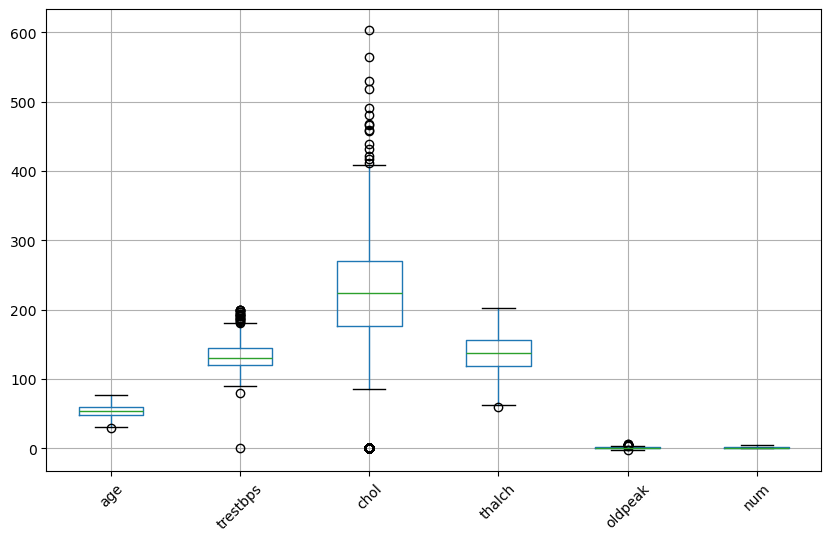

In [84]:
#Boxplot to identify outliers
plt.figure(figsize=(10,6))
df_num.boxplot()
plt.xticks(rotation=45)
plt.show()

In [85]:
#Outlier Treatment (IQR Capping)
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_num = df_num.clip(lower=lower, upper=upper, axis=1)


In [86]:
#Label encoding(Categorical variables)
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_LE = df_cat.apply(LE.fit_transform)
df_LE.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,0
1,1,1,0,1,0,1,0
2,1,0,0,1,0,1,0
3,1,3,0,0,0,1,0
4,1,0,0,1,1,1,0


In [87]:
#standardization(numerical variables)
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(df_num)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df.columns[[0,3,4,7,9,12]])
SS_X.head()

,age,trestbps,chol,thalch,oldpeak,num
0,1.006104,0.607417,0.264845,0.524203,1.411045,-0.881977
1,-1.397775,0.089009,-0.045006,-0.147763,-0.834669,-0.881977
2,0.350500,0.348213,-0.158618,0.449540,-0.444110,-0.881977
3,-0.195836,-0.792285,-0.220589,2.017461,-0.834669,-0.881977
4,0.350500,-1.207012,-0.065663,-0.371752,0.629927,-0.881977


In [88]:
#data partition
X = pd.concat([SS_X, df_LE], axis=1)    #column wise conacatinating
y = df["num"]

In [89]:
#Train-test splits
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [90]:
#Decision tree classifier model fitting
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [91]:
#Model predictions
y_pred = dt_model.predict(X_test)


In [92]:
print("Accuracy:",np.round (accuracy_score(y_test, y_pred),2))
print("Precision:", np.round(precision_score(y_test, y_pred, average='weighted'),2))
print("Recall:", np.round(recall_score(y_test, y_pred, average='weighted'),2))
print("F1 Score:",np.round( f1_score(y_test, y_pred, average='weighted'),2))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00         6

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [ ]:
Interpretations for DecisionTree classifier values:
  *In this dataset accuracy is 100%.That tells decision tree classifier perfectly identify all y values correctly.
  *It does not overfit and underfit.It is stable fit to predict models.
  *So it doesn't need any tunning parameters to apply.
  *The classification report provides precision, recall, F1-score, and support for each class, allowing detailed evaluation of model performance beyond
accuracy, especially for imbalanced datasets.

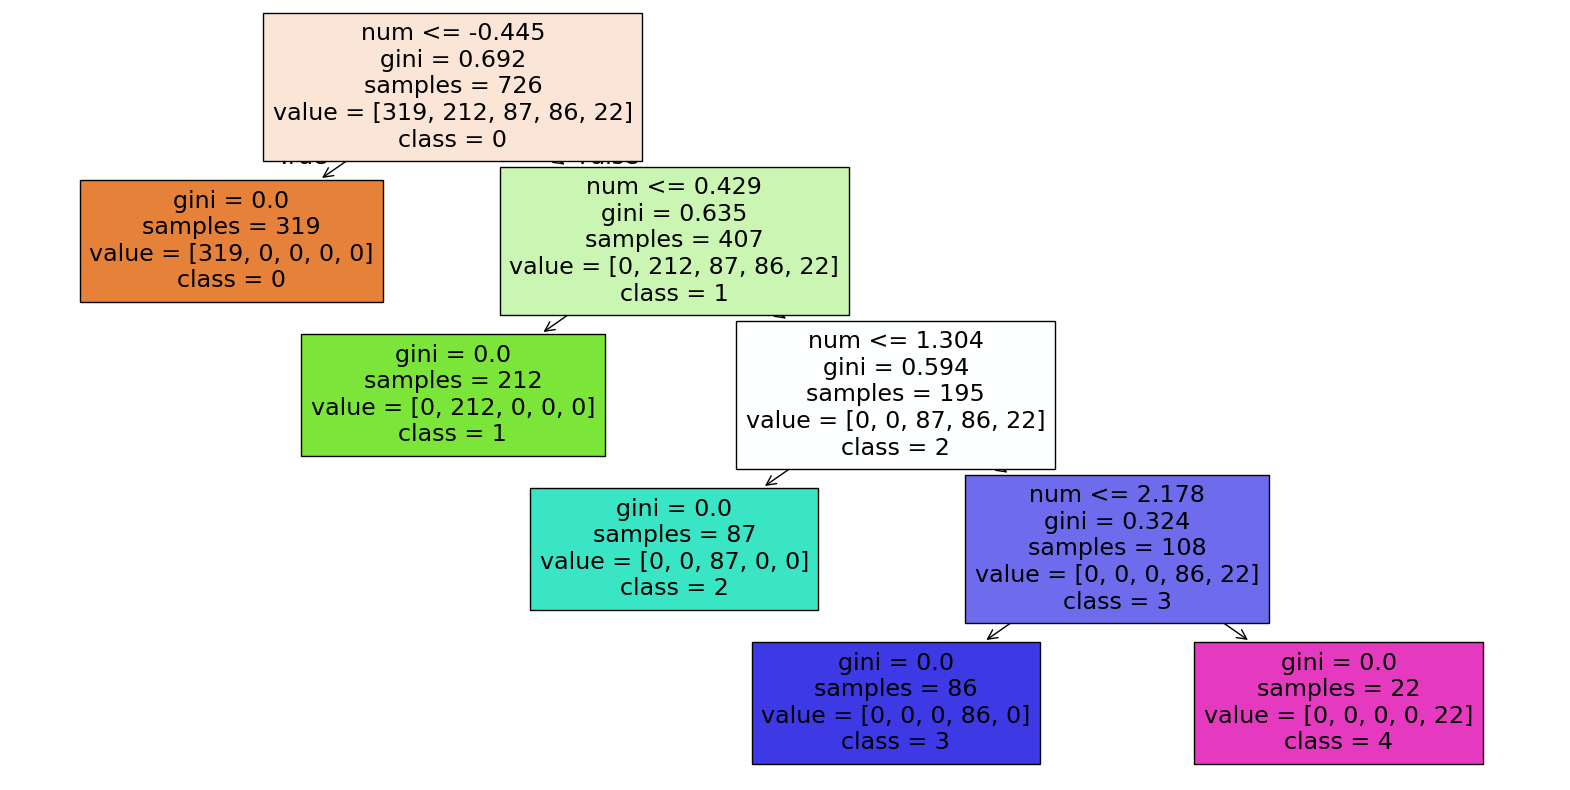

In [95]:
#visualization of decision tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,  # Get the first fitted estimator from cross-validation
    filled=True,
    feature_names=X.columns,
    class_names=['0','1','2','3','4'],
    
)
plt.show()

In [96]:
from sklearn.tree import DecisionTreeClassifier
n_nodes = dt_model.tree_.node_count
depth = dt_model.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")


Number of nodes: 9
Depth of the tree: 4


In [ ]:
Interview Question(Solutions)

1.Common hyperparameters of Decision Tree models and their impact:
     Decision Trees are powerful but prone to overfitting, so hyperparameters control model complexity,reduce overfitting and generalization.
   
   a.max_depth: Maximum depth of the tree,Controls how complex the tree becomes.

     Effect:
      *High value → overfitting
      *Low value → underfitting

   b.min_samples_split: Minimum number of samples required to split an internal node

     Effect:
      *Higher value → fewer splits, simpler tree
      *Reduces overfitting

   c.min_samples_leaf: Minimum samples required at a leaf node

     Effect:
       *Prevents very small leaf nodes
       *Improves stability and generalization
 
   d.criterion: Metric used to measure split quality

    Common options: gini,entropy,log_loss

     Effect:
       *Determines how purity of splits is calculated
       *entropy often handles complex data better

   e.max_features: Number of features considered at each split

     Effect:
       *Lower value → more randomness 
       *Reduces overfitting and improves generalization
   
   f.max_leaf_nodes: Maximum number of leaf nodes

     Effect:
       *Limits tree growth
       *Controls overfitting

In [ ]:
2. Difference between Label Encoding and One-Hot Encoding
      *Encoding converts categorical variables into numerical form for all ML models.
      *Label encoding assigns numeric labels and is suitable for ordinal data or target variables, while one-hot encoding creates binary features 
and is preferred for nominal categorical variables to avoid unintended ordering.

 a.Label Encoding: Label Encoding converts each category into a unique integer value.

   Advantages: 
        Simple and fast
        Memory efficient
        Useful for ordinal data
   Disadvantages:
        Introduces false ordering (Green > Blue > Red)
   Best used for:
        Categories has more than 5 features.
        Target variable (y)
        Ordinal features (Low < Medium < High)

 b.One-Hot Encoding: One-Hot Encoding creates a separate binary column for each category.

    Advantages:
         No false ordinal relationship
         Works well with most ML models
    Disadvantages:
        Increases dimensionality
        Can cause sparsity with many categories
    Best used for:
        Categories has less than 5 features because ,It occupy more columns in dataset.
        Nominal categorical features
        Linear Regression, Logistic Regression, SVM, KNN


                        